## Parte 1: Scaricamento dei dati e visualizzazione dei grafici

MSFT:
                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2011-11-30  25.590000  25.139999  25.370001  25.580000  81350900.0  20.704651
2011-12-01  25.629999  25.200001  25.559999  25.280001  48545400.0  20.461830
2011-12-02  25.620001  25.160000  25.590000  25.219999  52293800.0  20.413260
2011-12-05  25.799999  25.500000  25.780001  25.700001  56818400.0  20.801781
2011-12-06  25.870001  25.610001  25.809999  25.660000  46175300.0  20.769405 

GOOG:
                   High         Low        Open       Close     Volume  \
Date                                                                    
2011-11-30  298.635651  294.939484  297.858551  298.575867  6819466.0   
2011-12-01  306.849854  298.381592  298.879730  305.739014  7268342.0   
2011-12-02  310.834900  306.979370  307.372894  309.021698  8202028.0   
2011-12-05  314.770172  310.037903  312.648132  311.656830  6418970.0   


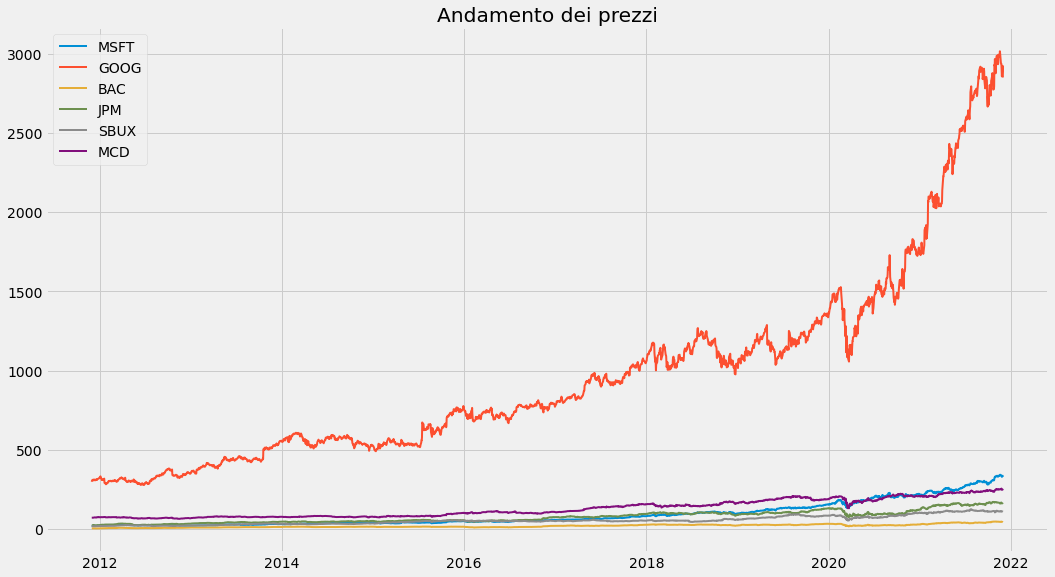

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
plt.style.use('fivethirtyeight')


#Definisco le date di riferimento
start_date = '2011-11-30'
end_date = '2021-11-30'

#Specifico la lista di tickers che mi interessano
tickers = ['MSFT', 'GOOG', 'BAC', 'JPM', 'SBUX', 'MCD']

#Inizializzo il dictionary principale che conerrà i dataframe relativi agli stock
datasets = {}


plt.figure(figsize=(16, 9))
for ticker in tickers:
    #plt.figure(figsize=(16, 9))
    #Scarico i dati da yahoo e faccio un grafico dei prezzi
    datasets[ticker] = web.get_data_yahoo(ticker, start_date, end_date)
    plt.title('Andamento dei prezzi')
    plt.grid(True)
    plt.plot(datasets[ticker]['Adj Close'], label = ticker, linewidth = 2)
    plt.legend()

    # Salvo il DataFrame in formato LaTeX per la relazione
    datasets[ticker].head().to_latex('head_' + ticker + '.tex')
    print(ticker + ':\n', datasets[ticker].head(), '\n')

#Salvo l'immagine
plt.savefig('./immagini/prezzi.png')

===STATISTICHE UNIVARIATE===

MSFT:
Media: 0.0012299139609670252
Varianza: 0.0003
Deviazione Stamdard: 0.01601208731469285
Asimmetria: 0.04279866814145253
Curtosi: 10.772843679830835

GOOG:
Media: 0.0010223309900170476
Varianza: 0.0003
Deviazione Stamdard: 0.015880523060674858
Asimmetria: 0.5573908168327004
Curtosi: 11.195789284117156

BAC:
Media: 0.001090238111580494
Varianza: 0.0004
Deviazione Stamdard: 0.01998627654187454
Asimmetria: 0.26477981405053685
Curtosi: 9.153659979240379

JPM:
Media: 0.0009034740054098149
Varianza: 0.0003
Deviazione Stamdard: 0.016977517922963304
Asimmetria: 0.28046863781877107
Curtosi: 14.256942846665373

SBUX:
Media: 0.0008329311974081584
Varianza: 0.0002
Deviazione Stamdard: 0.015686892433947844
Asimmetria: -0.0070127910558348185
Curtosi: 14.400959359088885

MCD:
Media: 0.0005609243821497138
Varianza: 0.0001
Deviazione Stamdard: 0.012213632571638431
Asimmetria: 0.5369047434277207
Curtosi: 38.5704612058121

        MSFT    GOOG     BAC     JPM    SBUX    

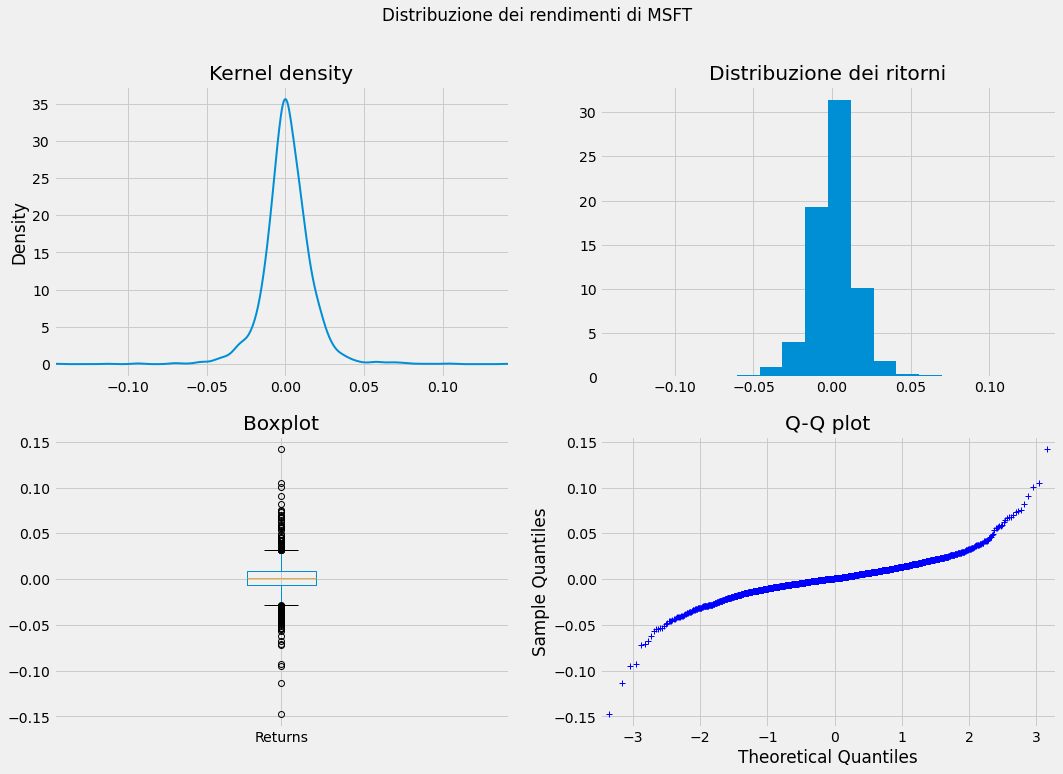

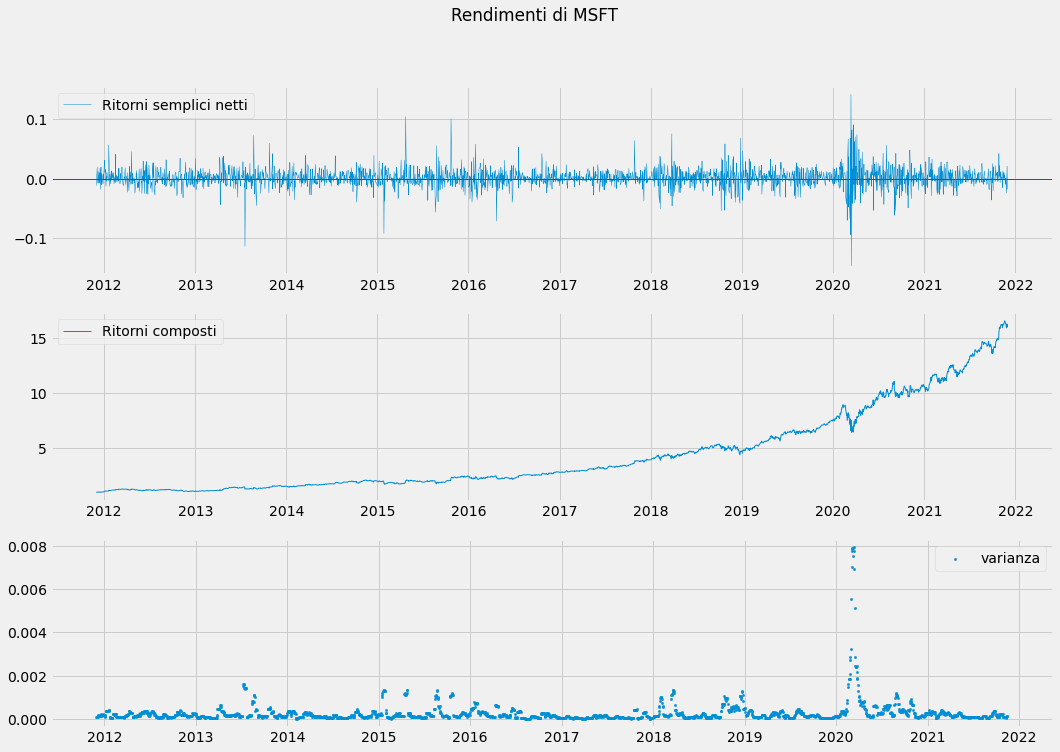

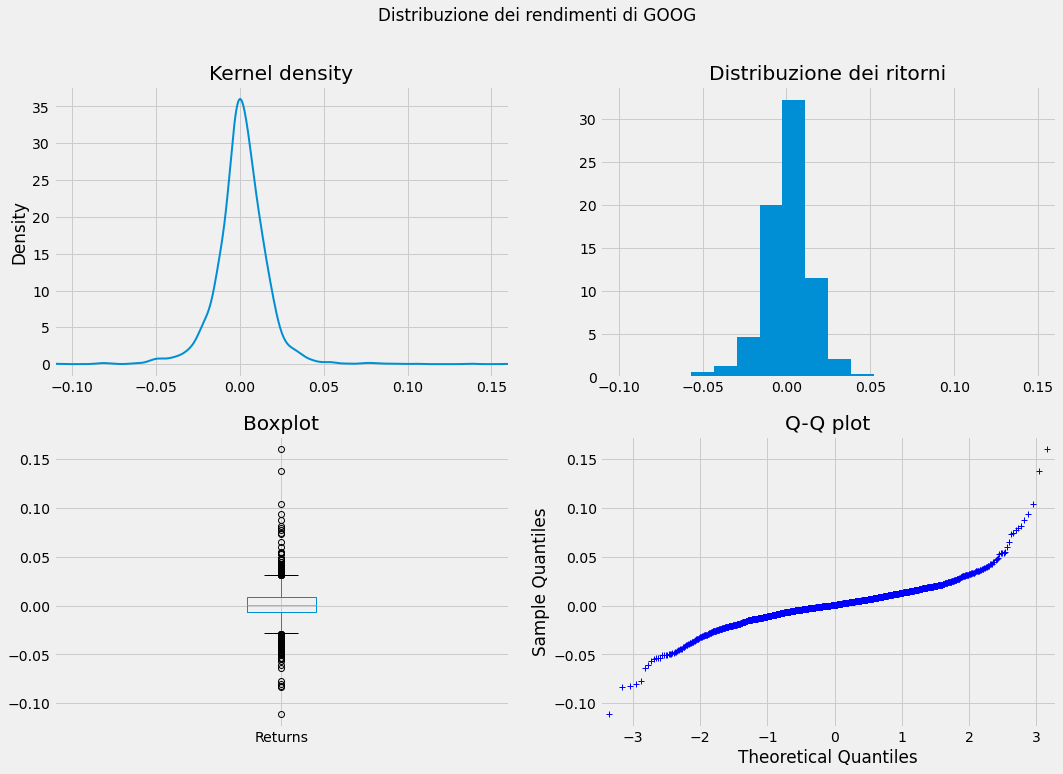

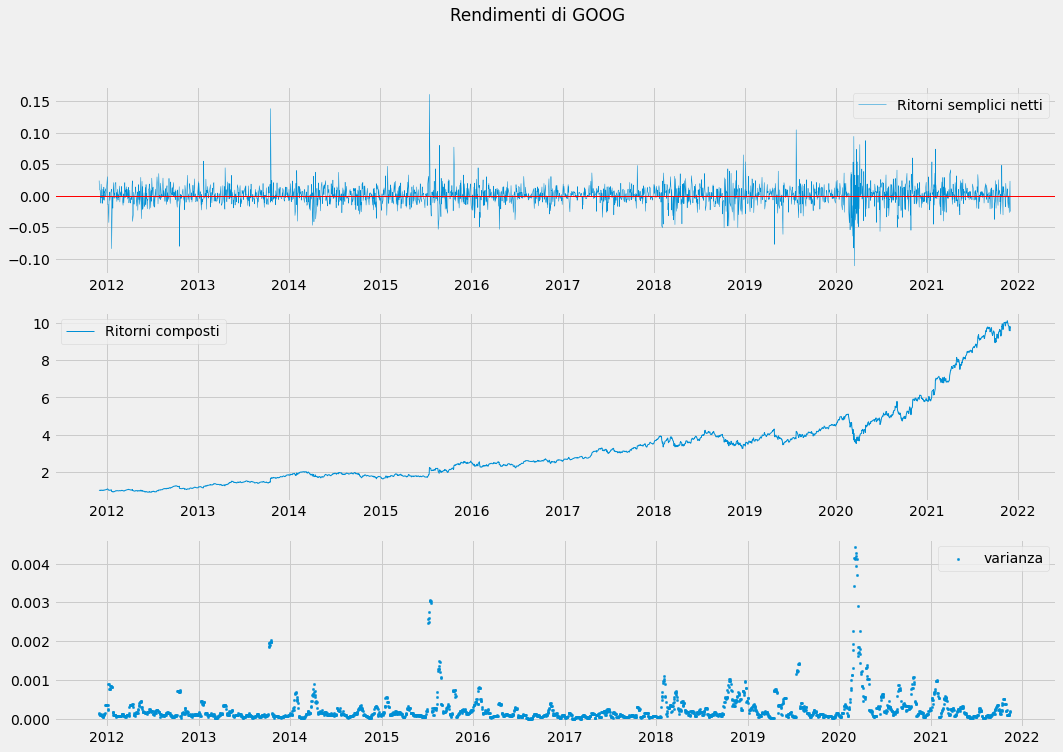

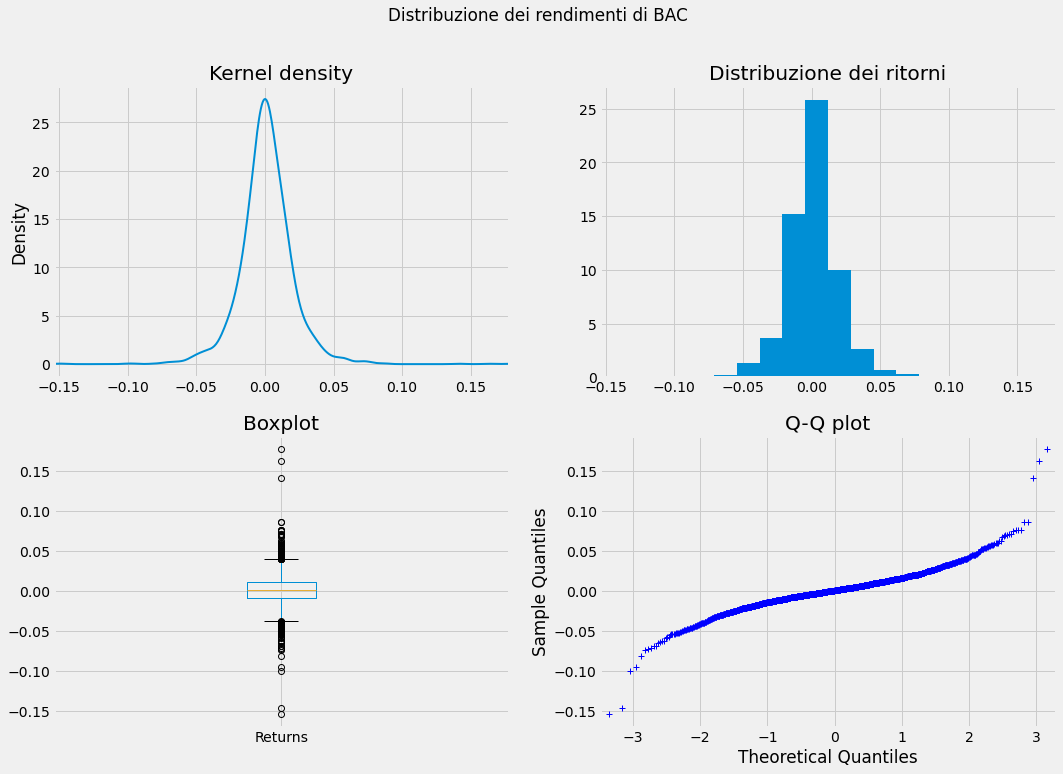

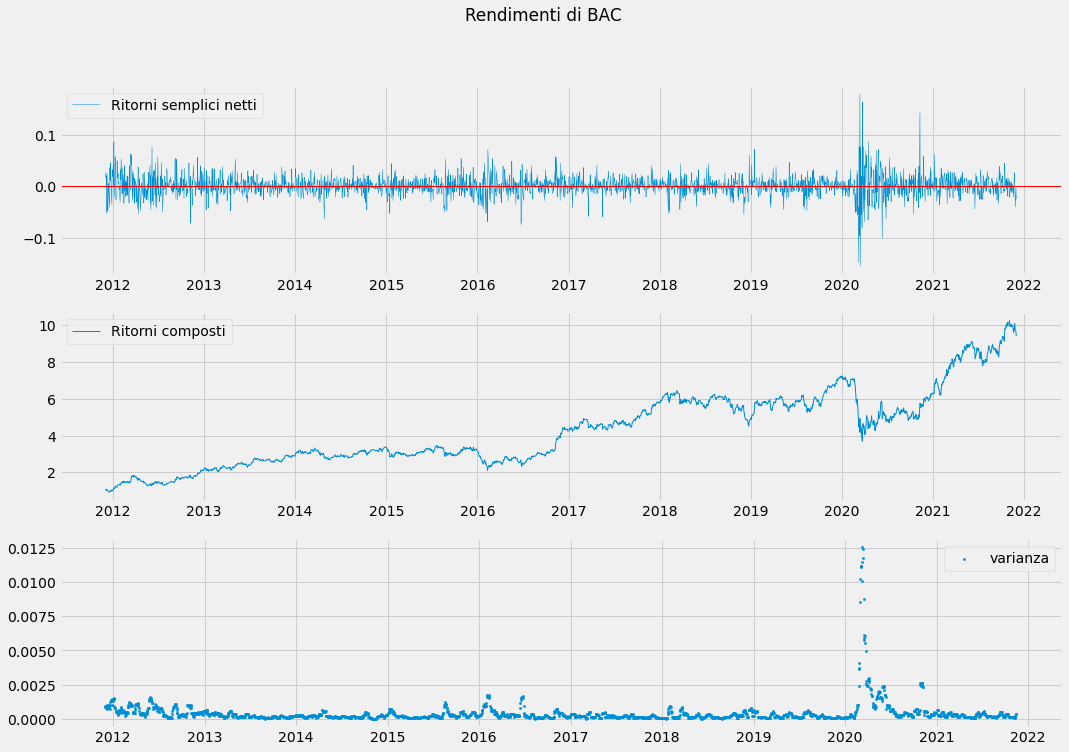

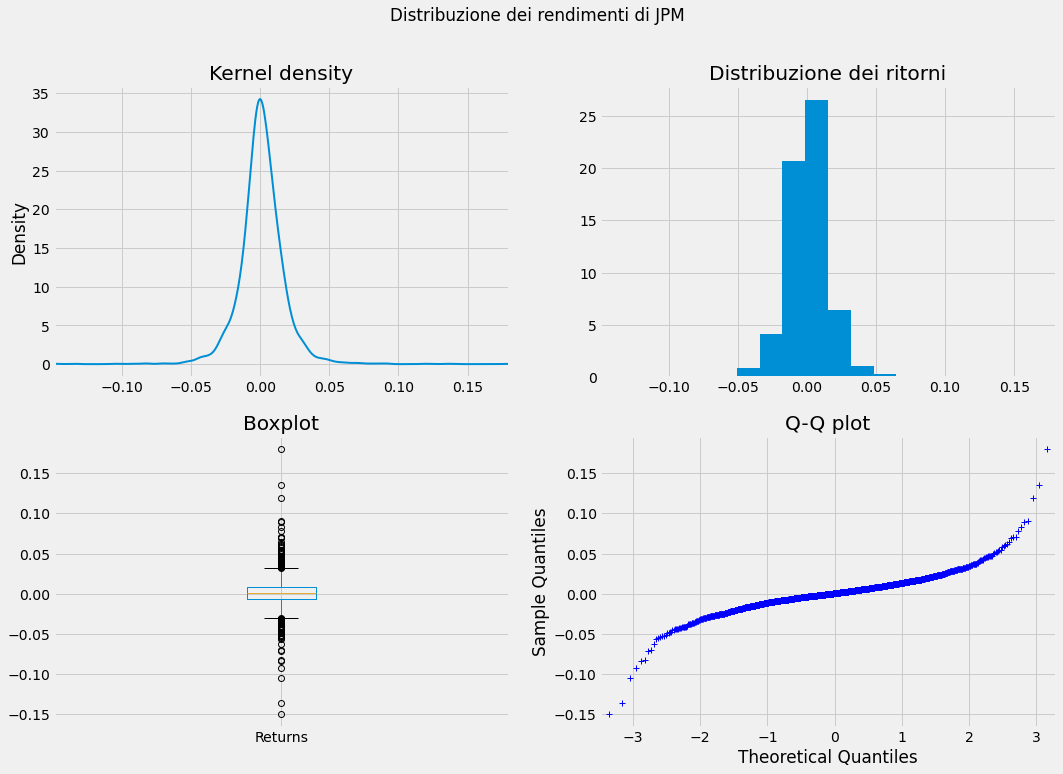

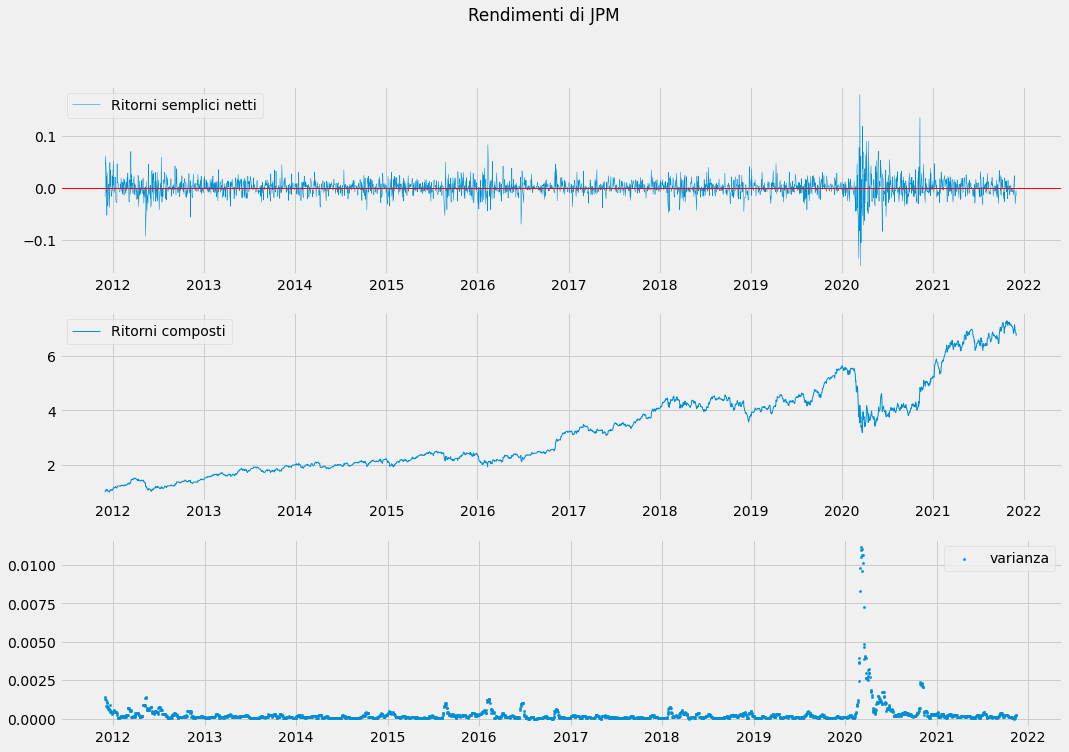

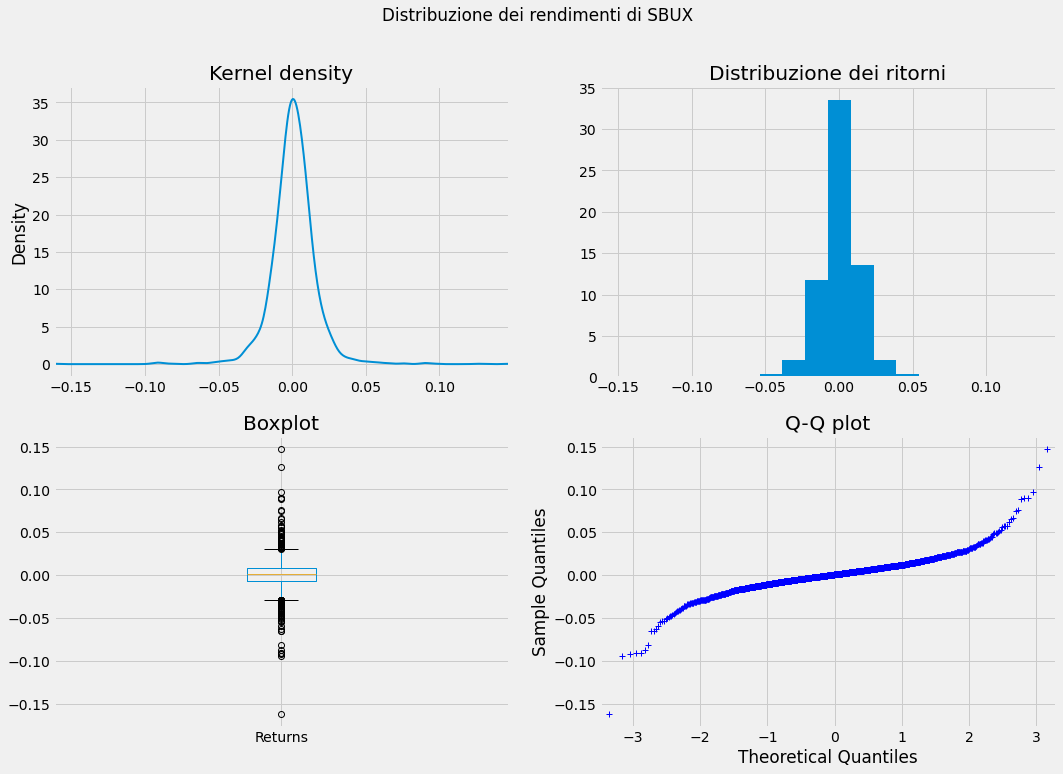

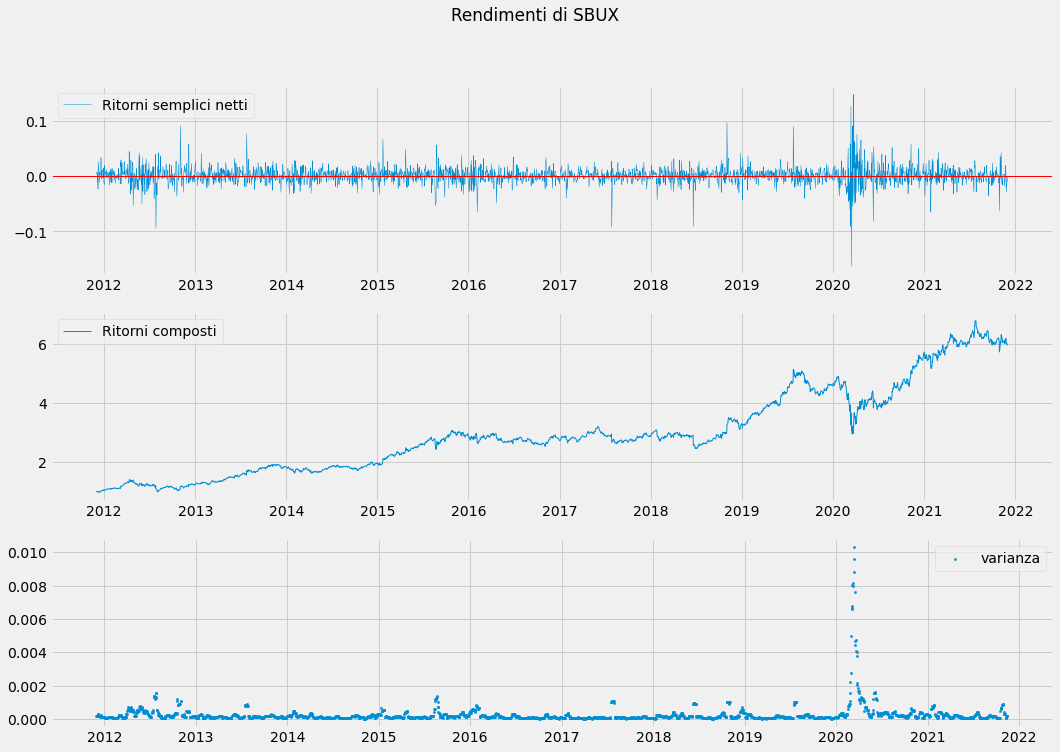

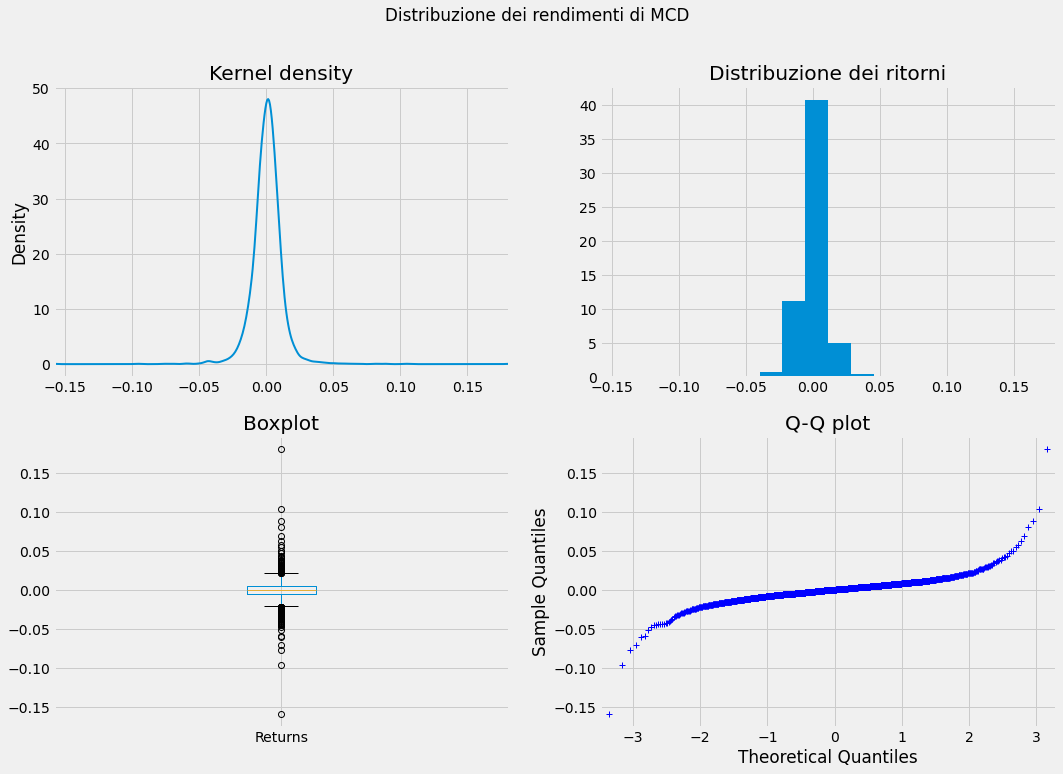

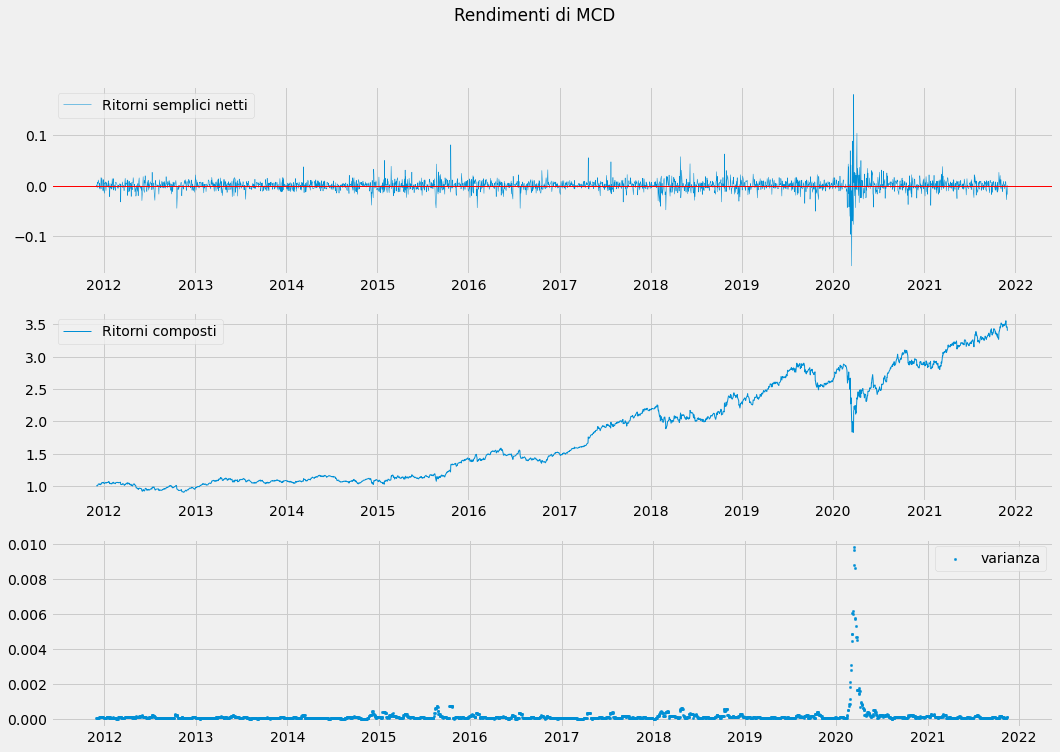

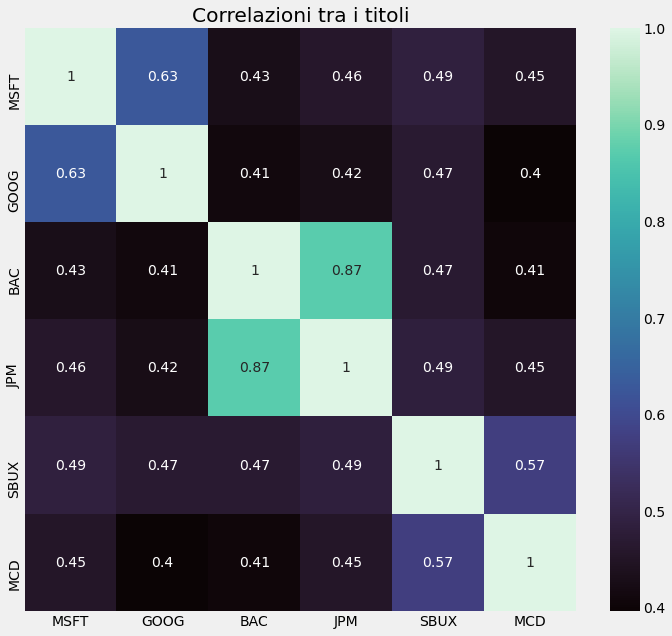

In [45]:
import statsmodels.api as sm
import seaborn as sns

# Creo un dataframe temporaneo per calcolare covarianza e correlazione più tardi
returns = pd.DataFrame()

# Scorro tutti i ticker
for ticker in tickers:

    # Creo un grafico 2x2 che contiene i dati relativi alla distribuzione dei ritorni
    fig, axes = plt.subplots(2, 2, figsize = (16, 11))
    fig.suptitle('Distribuzione dei rendimenti di ' + ticker)
    datasets[ticker]['Returns'] = datasets[ticker]['Adj Close'].pct_change()
    datasets[ticker]['Compounded_returns'] = (datasets[ticker]['Returns'] + 1).cumprod()
    returns[ticker] = datasets[ticker]['Returns']
    datasets[ticker]['Returns'] .plot.kde(ax = axes[0][0], alpha=1, linewidth=2)
    axes[0][0].set_xlim([datasets[ticker]['Returns'].min(), datasets[ticker]['Returns'].max()])
    axes[0][0].set_title('Kernel density')
    axes[0][1].set_title('Distribuzione dei ritorni')
    axes[0][1].set_xlim([datasets[ticker]['Returns'].min(), datasets[ticker]['Returns'].max()])
    axes[0][1].hist(datasets[ticker]['Returns'] , density=True, bins=20)
    axes[1][0].set_title('Boxplot')
    axes[1][1].set_title('Q-Q plot')
    datasets[ticker]['Returns'] .to_frame().boxplot(ax = axes[1][0])
    sm.qqplot(datasets[ticker]['Returns'] , ax=axes[1][1], marker='+')

    #Salvo il grafico
    plt.savefig('./immagini/' + ticker + '_diagnostico.png')

    # Creo il grafico dei ritorni
    fig, axes = plt.subplots(3, 1, figsize = (16, 11))
    axes[0].plot(datasets[ticker]['Returns'], label = 'Ritorni semplici netti', linewidth = 0.5)
    axes[0].axhline(color='red', linewidth = 1)
    axes[1].plot(datasets[ticker]['Compounded_returns'], label = 'Ritorni composti', linewidth = 1)
    #axes[0].set_title('Ritorni semplici netti')
    #axes[1].set_title('Ritorni composti')
    axes[0].legend()
    axes[1].legend()
    # axes[0].set_xlabel('Data')
    # axes[1].set_xlabel('Data')
    fig.suptitle('Rendimenti di ' + ticker)


    # Grafici dell'evoluzione della volatilità nel tempo

    # plt.figure(figsize=(16, 9))
    window = 10
    indexes = []
    variance_list = []
    for i in range(datasets[ticker].shape[0] - window):
        variance_list.append(datasets[ticker]['Returns'][i : i + window].var())
        indexes.append(datasets[ticker].index[i])

    axes[2].scatter(indexes, variance_list, s = 5, label = 'varianza')
    axes[2].legend()
    # axes[2].set_title("Andamento della volatilità di " + ticker)
    plt.savefig('./immagini/' + ticker + '_ritorni.png')


# Calcolo e stampo alcune statistiche dei singoli stock
print('===STATISTICHE UNIVARIATE===\n')
for ticker in tickers:
    print(ticker + ':')
    print('Media: ' + str(datasets[ticker]['Returns'].mean()))
    std = datasets[ticker]['Returns'] .std()
    var = datasets[ticker]['Returns'] .var()
    print('Varianza: ' + str(np.round(std ** 2, 4)))
    print('Deviazione Stamdard: ' + str(std))
    print('Asimmetria: ' + str(datasets[ticker]['Returns'] .skew()))
    print('Curtosi: ' + str(datasets[ticker]['Returns'] .kurtosis()) + '\n')

print(np.round(returns.cov(), 4))

returns.cov().to_latex('cov_mat.tex')
# Creo il grafico di correlazione
plt.figure(figsize=(11, 10))
plt.title('Correlazioni tra i titoli')
sns.heatmap(returns.corr(), annot = True, cmap='mako')
plt.savefig('./immagini/Correlazioni.png')
plt.show()


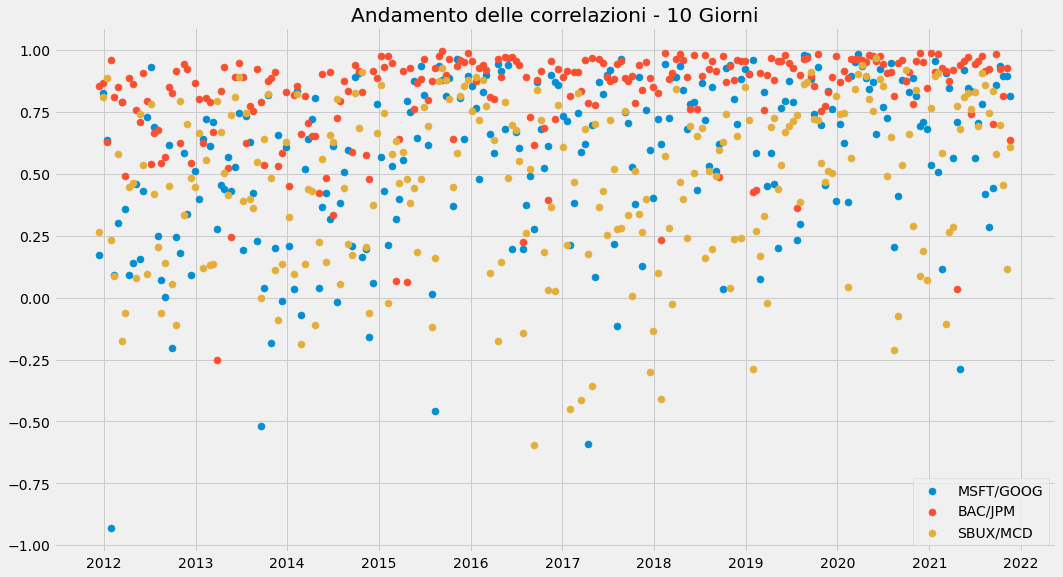

In [209]:
#Calcolo l'andamento delle correlazioni tra i titoli

#Specifico la dimensione della finestra da considerare
window = 10

plt.figure(figsize = (16, 9))
# Ciclo ogni coppia di ticker in modo da non prendere più volte la stessa coppia
for ticks in [[tickers[0], tickers[1]], [tickers[2], tickers[3]], [tickers[4], tickers[5]]]:
    t1 = ticks[0]
    t2 = ticks[1]
    plt.title('Andamento delle correlazioni - ' + str(window) + ' Giorni')
    correlations = []
    indexes = []

    # Ciclo il periodo saltando da una finestra di tempo a quella successiva
    for i in range(0, returns[t1].shape[0] - window, window):

        # Calcolo la correlazione nella finestra corrente
        df = pd.DataFrame({t1: returns[t1].iloc[i:i + window], t2: returns[t2].iloc[i:i + window]})
        correlations.append(df.corr()[t1][t2])
        indexes.append(returns[t1].index[i + window])

    # Creo il grafico passando come x le date e come y i valori delle correlazioni
    plt.scatter(indexes, correlations, label = t1 + '/' + t2, s = 50)

# Salvo il grafico
plt.legend()
plt.savefig('./immagini/correlazioni_scatter.png')


## Previsione con rete neurale

In [2]:
from tensorflow import keras

val = datasets[tickers[0]].loc['2021-01-31' : '2021-11-30']
# Inizializzo le dimensioni dell'input e dell'output
window_size = output_size = val.shape[0]

best_models = {}
# Inizializzo il dataframe con le previsioni, usando le date come indice
predicted = pd.DataFrame(index = datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - val.shape[0]:])
for ticker in tickers:
    best_models[ticker] = None
    # Divido i dati in 80 mesi di train, 30 di test e 10 di valiazione
    train = datasets[ticker]['Adj Close'].loc[start_date : '2018-07-30']
    test = datasets[ticker]['Adj Close'].loc['2018-07-31':'2021-01-30']
    validation = datasets[ticker]['Adj Close'].loc['2021-01-31':'2021-11-30']

    best_model = None
    best_performance = None


    # Scorro un intero per fare la ricerca dell'iperparametro migliore nel modello (epochs e batch size)
    for i in range(1, 30):

        # Creo gli input e gli output di training e test
        train_inputs = np.asarray([train[i:i+window_size] for i in range(0, train.shape[0] - output_size - window_size)]).reshape((train.shape[0] - window_size - output_size, window_size, 1))
        train_outputs = np.asarray([train[i + window_size:i + window_size + output_size] for i in range(0, train_inputs.shape[0])]).reshape((train_inputs.shape[0], output_size, 1))

        test_inputs = np.asarray([test[i:i+window_size] for i in range(test.shape[0] - window_size - output_size)]).reshape((test.shape[0] - window_size - output_size, window_size, 1))
        test_outputs = np.asarray([test[i + window_size : i + window_size + output_size] for i in range(0, test_inputs.shape[0])]).reshape((test_inputs.shape[0], output_size, 1))

        # Costruisco il modello con un layer di 50 neuroni
        model = keras.Sequential([
            keras.layers.Dense(50, activation = 'relu'),
            keras.layers.Dense(1)
        ])

        # Compilo il modello con loss function mean absolute error e come metrica l'errore percentuale
        model.compile(
            optimizer = keras.optimizers.Adam(),
            loss='mae',
            metrics = ['mape']
        )

        # Avvio il processo di learning dai dati di training
        model.fit(train_inputs, train_outputs, epochs = i + 5, batch_size=i)

        # valuto il modello e lo sostituisco a quello corrente, se ottiene un errore minore sui dati di test
        performance = model.evaluate(test_inputs, test_outputs)
        print(performance)

        if best_performance is None or performance[1] < best_performance[1]:
            best_model = model
            best_performance = performance
            best_models[ticker] = model

    # Avvio la predizione sugli ultimi 10 mesi
    predictions = pd.DataFrame(
        best_model.predict(np.asarray(datasets[ticker]['Adj Close'][datasets[ticker].shape[0] - validation.shape[0] - window_size : datasets[ticker].shape[0] - validation.shape[0]]).reshape(1, window_size))[0],
        index=datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - output_size:])


    predicted[ticker] = predictions

Epoch 1/6
1254/1254 [==============================] - 4s 2ms/step - loss: 5.8770 - mape: 13.1104
Epoch 2/6
1254/1254 [==============================] - 2s 2ms/step - loss: 3.9741 - mape: 9.1189
Epoch 3/6
1254/1254 [==============================] - 2s 1ms/step - loss: 3.9467 - mape: 9.0924
Epoch 4/6
1254/1254 [==============================] - 2s 2ms/step - loss: 3.9322 - mape: 9.0963
Epoch 5/6
1254/1254 [==============================] - 3s 2ms/step - loss: 3.9376 - mape: 9.0995
Epoch 6/6
7/7 [==============================] - 0s 4ms/step - loss: 14.7969 - mape: 8.3223
[14.796859741210938, 8.322271347045898]
Epoch 1/7
627/627 [==============================] - 1s 1ms/step - loss: 13.7193 - mape: 29.2228
Epoch 2/7
627/627 [==============================] - 1s 1ms/step - loss: 3.9629 - mape: 9.1422
Epoch 3/7
627/627 [==============================] - 1s 2ms/step - loss: 3.9474 - mape: 9.0831
Epoch 4/7
627/627 [==============================] - 1s 2ms/step - loss: 3.9451 - mape: 9.1029


In [3]:
predicted_df = pd.DataFrame(index = ['Errore %', 'Correlazione'])



for ticker in tickers:
    validation = datasets[ticker]['Adj Close'].loc['2021-01-31':'2021-11-30']
    validation_inputs = np.asarray(datasets[ticker]['Adj Close'][datasets[ticker].shape[0] - validation.shape[0] - window_size : datasets[ticker].shape[0] - validation.shape[0]]).reshape(1, window_size)

    validation_outputs = np.asarray(validation).reshape(1, validation.shape[0])
    temp = pd.DataFrame()
    real_prices = datasets[ticker]['Adj Close'].loc['2021-01-30':]
    temp['real'] = real_prices
    temp['pred'] = predicted[ticker]
    predicted_df[ticker] = [best_models[ticker].evaluate(validation_inputs, validation_outputs)[1], temp.corr().iloc[0, 1]]

print(predicted_df)
predicted_df.to_latex('previsioni_prestazioni.tex')

1/1 [==============================] - 0s 107ms/step - loss: 21.6360 - mape: 9.4159
                  MSFT       GOOG        BAC        JPM       SBUX       MCD
Errore %      7.011436  26.802584  41.523056  26.720486  29.539957  9.415922
Correlazione  0.752091   0.845179   0.816226   0.726767   0.386486  0.765910


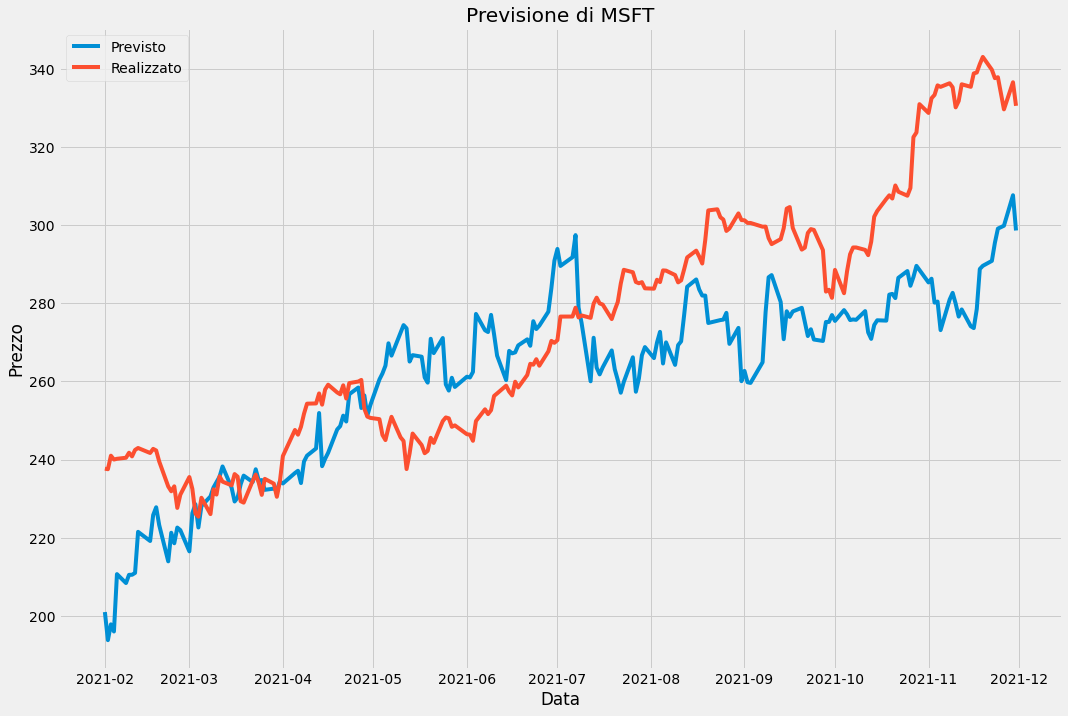

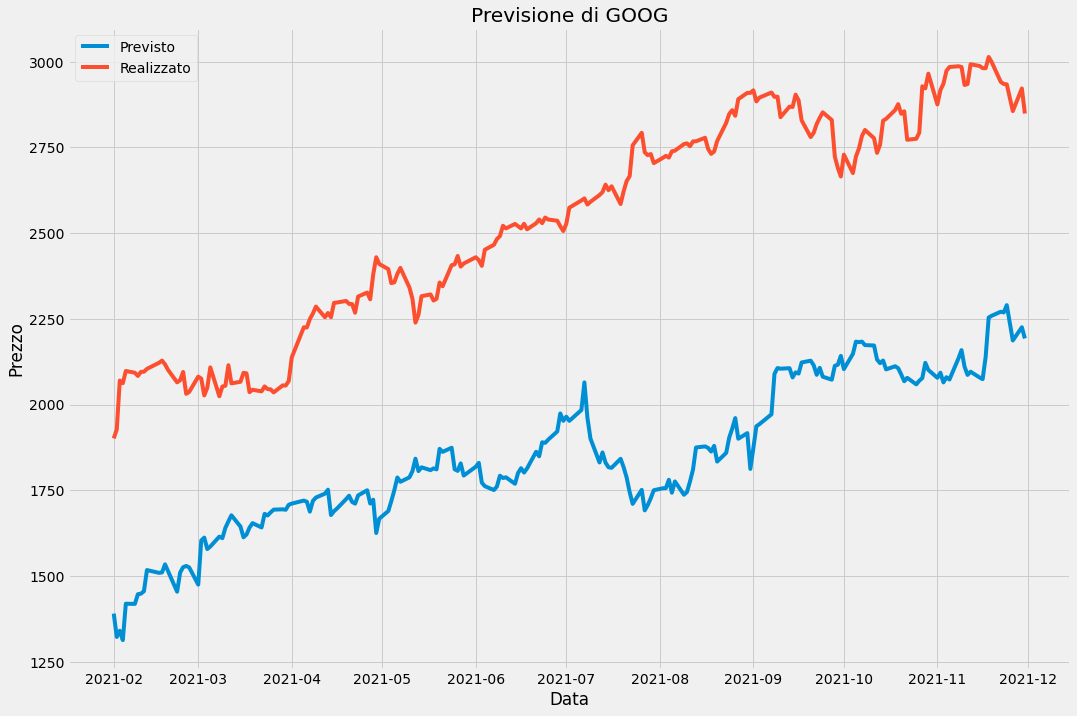

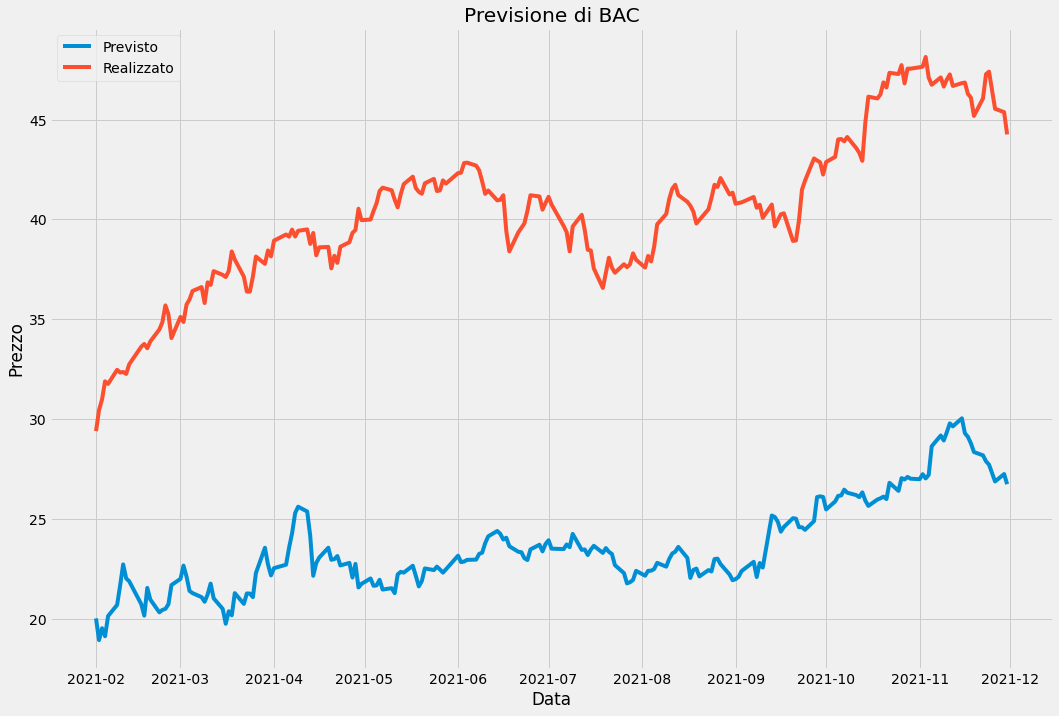

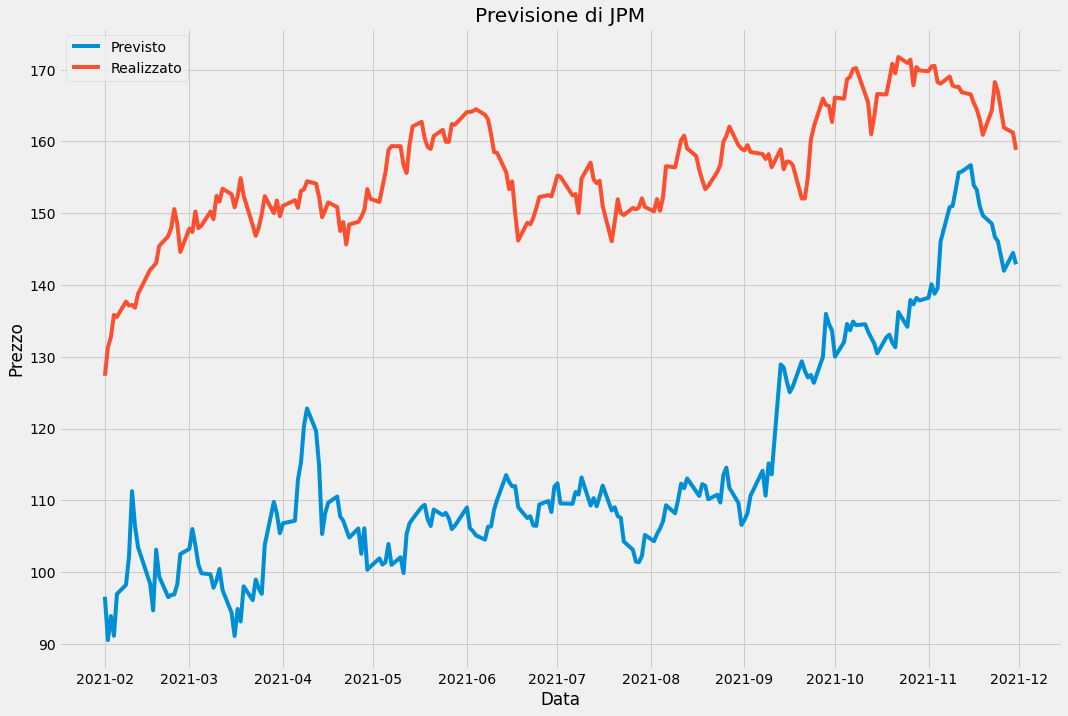

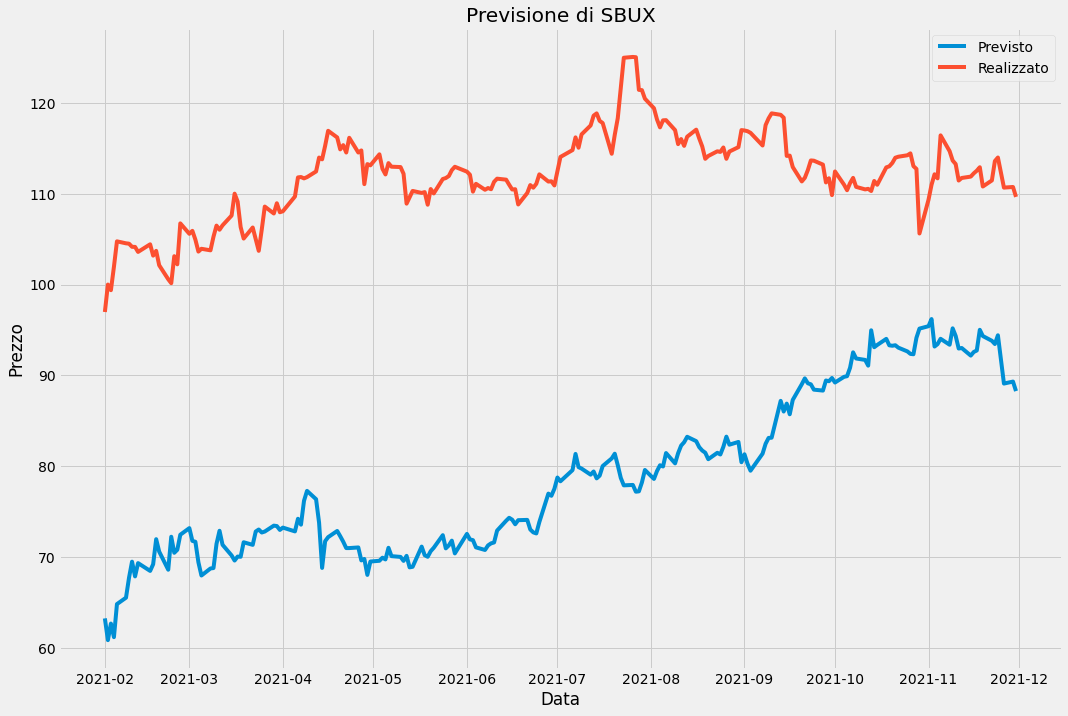

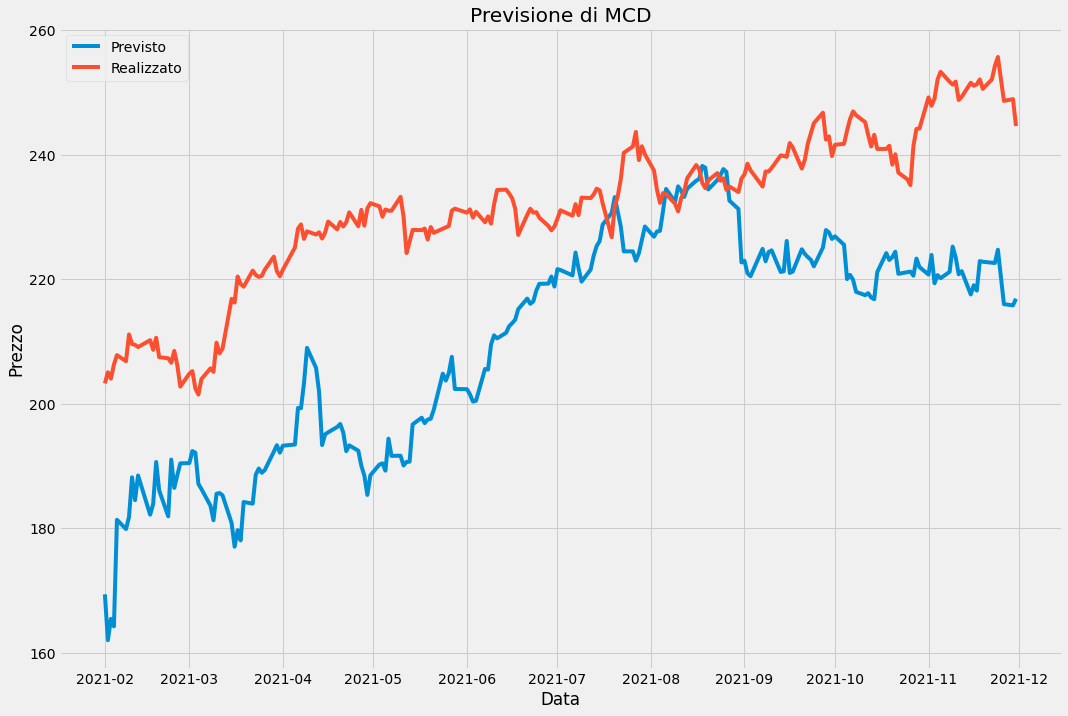

In [4]:
for ticker in tickers:
    out = predictions = pd.DataFrame(
        best_models[ticker].predict(np.asarray(datasets[ticker]['Adj Close'][datasets[ticker].shape[0] - val.shape[0] - window_size : datasets[ticker].shape[0] - val.shape[0]]).reshape(1, window_size))[0],
        index=datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - output_size:])

    plt.figure(figsize=(16, 11))
    plt.title('Previsione di ' + ticker)
    plt.plot(out, label = 'Previsto')
    plt.plot(datasets[ticker]['Adj Close'].loc['2021-01-31':], label = 'Realizzato')
    plt.legend()
    plt.ylabel('Prezzo')
    plt.xlabel('Data')
    plt.savefig('./immagini/' + ticker + '_forecast.png')


## Capital Asset Pricing Model

#### Calcolo del Beta dei titoli

In [124]:
import pandas_datareader as web

# Inizializzo il dictionary che conterrà i beta e scarico i dati di S&P500
betas = pd.DataFrame(index=['Beta', 'Exp_return'])
sp500 = web.get_data_yahoo('^GSPC', start_date, end_date)
sp500_returns = sp500['Adj Close'].resample('M').last().pct_change()
# Calcolo il beta di ogni titolo
for ticker in tickers:
    temp = pd.DataFrame()
    temp[ticker] = datasets[ticker]['Adj Close'].resample('M').last().pct_change()
    temp['Benchmark'] = sp500_returns
    cov_mat = temp.cov()

    # Il beta è dato dal rapporto tra la covarianza tra titolo e mercato e la varianza del mercato
    betas[ticker] = cov_mat[ticker]['Benchmark'] / cov_mat['Benchmark']['Benchmark']

# Calcolo il ritorno atteso utilizzando il beta dei titoli
# Utilizzo un tasso risk-free nullo
risk_free_rate = 0
for ticker in tickers:
    betas[ticker].loc['Exp_return'] = risk_free_rate + betas[ticker].loc['Beta'] * (sp500_returns.mean() * 12 - risk_free_rate)
print(betas)
betas.to_latex('CAPM.tex')

                MSFT      GOOG       BAC       JPM      SBUX       MCD
Beta        0.961292  1.018338  1.519352  1.264511  0.805962  0.612571
Exp_return  0.133592  0.141520  0.211146  0.175731  0.112006  0.085130


### Modello Fama-French a tre fattori

In [10]:
import statsmodels.formula.api as smf


ff_regression_results = pd.DataFrame(index=['Intercept', 'MKT', 'SMB', 'HML', 'R squared'])
ff_pvalues = pd.DataFrame(index = ['Intercept', 'MKT', 'SMB', 'HML'])

# Salvo il CSV dei fattori
factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=3)

# Rimuovo la parte dei fattori annuali e tengo solo i mensili
factors = factors[factors.index < factors[factors.iloc[:, 0] == " Annual Factors: January-December "].index[0]]

# Rinomino le colonne del dataframe
factors.columns = ['Date', 'MKT', 'SMB', 'HML', 'RF']
factors['Date'] = pd.to_datetime(factors['Date'], format = '%Y%m').dt.strftime('%Y-%m')
factors = factors.set_index('Date')
factors = factors[start_date : end_date]

factors = factors.apply(pd.to_numeric, errors = 'coerce').div(100)

# Scorro i ticker per calcolare l'esposizione ai fattori Fama-French
for ticker in tickers:
    # Calcolo i ritorni semplici con granularità mensile
    y = datasets[ticker]['Adj Close'].resample('M').last().pct_change()

    # Aggiusto l'indice con la formattazione YYYY-MM
    y.index = y.index.strftime('%Y-%m')
    # Nomino la colonna del dataframe con il ticker
    y.name = ticker
    ff_data = factors.join(y)
    # Converto le colonne in float per evitare problemi di conversione di tipo

    ff_data['excess_return'] = ff_data[ticker] - ff_data['RF']

    # Avvio il modello di regressione basato sui parametri Fama-French e controllo i parametri trovati
    ff_model = smf.ols('excess_return ~ MKT + SMB + HML', data=ff_data).fit()
    ff_regression_results[ticker] = np.concatenate([ff_model.params, [ff_model.rsquared_adj]])
    ff_pvalues[ticker] = np.round(ff_model.pvalues, 3)

ff_regression_results = np.round(ff_regression_results, 3)

ff_pvalues.to_latex('Fama-French-pvalues.tex')
ff_regression_results.to_latex('Fama-French-regression.tex')

print(ff_regression_results, '\n')
print(ff_pvalues)

            MSFT   GOOG    BAC    JPM   SBUX    MCD
Intercept  0.011  0.007  0.008  0.006  0.006  0.003
MKT        1.027  1.048  1.335  1.113  0.807  0.647
SMB       -0.650 -0.538  0.207  0.011 -0.224 -0.611
HML       -0.278 -0.128  1.088  1.011  0.057  0.136
R squared  0.423  0.374  0.591  0.681  0.235  0.344 

            MSFT   GOOG    BAC    JPM   SBUX    MCD
Intercept  0.016  0.160  0.166  0.107  0.280  0.445
MKT        0.000  0.000  0.000  0.000  0.000  0.000
SMB        0.000  0.007  0.349  0.944  0.292  0.000
HML        0.049  0.411  0.000  0.000  0.730  0.216


## Strategie di trading

### Strategia con e senza il VIX

In [113]:
import itertools as it

def strategia(use_vix: bool, start_date, end_date, fees, datasets):
    vix = None
    vix_ma = pd.DataFrame()

    # Se si vuole considerare il vix, calcolo le varie medie mobili
    if use_vix:
        vix = web.get_data_yahoo('^VIX', start_date, end_date)['Adj Close']
        ma1 = range(10, 281, 5)
        for s1 in ma1:
            vix_ma['SMA' + str(s1)] = vix.rolling(s1).mean()
            vix_ma['EWM' + str(s1)] = vix.ewm(span = s1, adjust = False).mean()

    best_strategies = {}
    best_parameters = {}

    # Calcolo le medie mobili dei vari stock
    for ticker in datasets.keys():
        ma1 = range(10, 281, 5)
        for s1 in ma1:
            datasets[ticker]['SMA' + str(s1)] = datasets[ticker]['Adj Close'].rolling(s1).mean()
            datasets[ticker]['EWM' + str(s1)] = datasets[ticker]['Adj Close'].ewm(span = s1, adjust = False).mean()

    for ticker in datasets.keys():
        print(ticker)
        ma1 = range(10, 181, 5)
        ma2 = range(20, 281, 10)
        best_strategies[ticker] = pd.DataFrame()
        best_parameters[ticker] = {'SMA': (None, None), 'EWM': (None, None)}

        for s1, s2 in it.product(ma1, ma2):
            if s1 < s2:
                s3 = s1
                s4 = s2
                invested_sma = [*[0], *[1 if
                                        datasets[ticker]['SMA' + str(s1)].iloc[i - 1] > datasets[ticker]['SMA' + str(s2)].iloc[i - 1]
                                        and (not use_vix or
                                             vix_ma['SMA' + str(s3)].iloc[i - 1] < vix_ma['SMA' + str(s4)].iloc[i - 1]
                                             )
                                        else 0 for i in range(1, len(datasets[ticker]))]]

                invested_ewm = [*[0], *[1 if
                                        datasets[ticker]['EWM' + str(s1)].iloc[i - 1] > datasets[ticker]['EWM' + str(s2)].iloc[i - 1]
                                        and (not use_vix or
                                             vix_ma['EWM' + str(s3)].iloc[i - 1] < vix_ma['EWM' + str(s4)].iloc[i - 1])
                                        else 0 for i in range(1, len(datasets[ticker]))]]

                sma_returns = datasets[ticker]['Returns'] + 1
                ewm_returns = datasets[ticker]['Returns'] + 1

                # Aggiorno i rendimenti lordi a 1 dove non viene fatto alcun investimento, per non influire sul prodotto cumulato
                for i in range(len(invested_sma)):
                    if invested_sma[i] == 0:
                        sma_returns.iloc[i] = 1
                    if invested_ewm[i] == 0:
                        ewm_returns.iloc[i] = 1

                # Per considerare i ritorni aggiustati con le transazioni, moltiplico i ritorni finali dei periodi per il residuo netto del capitale
                for i in range(1, len(invested_sma)):
                    if invested_sma[i] != invested_sma[i - 1]:
                        if invested_sma[i] == 1:
                            sma_returns[i] *= (1 - fees)
                        else:
                            sma_returns[i - 1] *= (1 - fees)
                    if invested_ewm[i] != invested_ewm[i - 1]:
                        if invested_sma[i] == 1:
                            ewm_returns[i] *= (1 - fees)
                        else:
                            ewm_returns[i - 1] *= (1 - fees)

                # Calcolo i ritorni generati dalle strategie
                sma_returns = sma_returns.cumprod()
                ewm_returns = ewm_returns.cumprod()

                # Sostituisco eventuali strategie migliori nella struttura dati finale
                if best_parameters[ticker]['SMA'] == (None, None)\
                        or best_strategies[ticker]['SMA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
                    best_strategies[ticker]['SMA_Returns'] = sma_returns
                    best_strategies[ticker]['Invested_SMA'] = invested_sma
                    best_parameters[ticker]['SMA'] = (s1, s2)

                if best_parameters[ticker]['EWM'] == (None, None)\
                        or best_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
                    best_strategies[ticker]['EWM_Returns'] = ewm_returns
                    best_strategies[ticker]['Invested_EWM'] = invested_ewm
                    best_parameters[ticker]['EWM'] = (s1, s2)

        print(best_strategies[ticker]['EWM_Returns'], best_strategies[ticker]['SMA_Returns'])

    return best_strategies, best_parameters


In [114]:
fees = 0.002
strat_1, par_1 = strategia(use_vix=False, start_date=start_date, end_date=end_date, fees=fees, datasets=datasets)

/var/folders/2s/593k_fln20z3h0clfg_fjvdr0000gn/T/ipykernel_1149/2562257991.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datasets[ticker]['EWM' + str(s1)] = datasets[ticker]['Adj Close'].ewm(span = s1, adjust = False).mean()
/var/folders/2s/593k_fln20z3h0clfg_fjvdr0000gn/T/ipykernel_1149/2562257991.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datasets[ticker]['SMA' + str(s1)] = datasets[ticker]['Adj Close'].rolling(s1).mean()


MSFT
Date
2011-11-30     1.000000
2011-12-01     1.000000
2011-12-02     1.000000
2011-12-05     1.000000
2011-12-06     1.000000
                ...    
2021-11-23    16.013827
2021-11-24    16.024735
2021-11-26    15.634442
2021-11-29    15.964033
2021-11-30    15.677597
Name: EWM_Returns, Length: 2517, dtype: float64 Date
2011-11-30     1.000000
2011-12-01     1.000000
2011-12-02     1.000000
2011-12-05     1.000000
2011-12-06     1.000000
                ...    
2021-11-23    12.984865
2021-11-24    12.993710
2021-11-26    12.677240
2021-11-29    12.944490
2021-11-30    12.712232
Name: SMA_Returns, Length: 2517, dtype: float64
GOOG
Date
2011-11-30    1.000000
2011-12-01    0.998000
2011-12-02    1.008715
2011-12-05    1.017317
2011-12-06    1.014260
                ...   
2021-11-23    8.407970
2021-11-24    8.405708
2021-11-26    8.181611
2021-11-29    8.371132
2021-11-30    8.161330
Name: EWM_Returns, Length: 2517, dtype: float64 Date
2011-11-30    1.000000
2011-12-01    1.000000

In [116]:
strat_2, par_2 = strategia(use_vix=True, start_date=start_date, end_date=end_date, fees=fees, datasets=datasets)

/var/folders/2s/593k_fln20z3h0clfg_fjvdr0000gn/T/ipykernel_1149/2562257991.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vix_ma['SMA' + str(s1)] = vix.rolling(s1).mean()
/var/folders/2s/593k_fln20z3h0clfg_fjvdr0000gn/T/ipykernel_1149/2562257991.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vix_ma['EWM' + str(s1)] = vix.ewm(span = s1, adjust = False).mean()


MSFT
Date
2011-11-30    1.000000
2011-12-01    1.000000
2011-12-02    1.000000
2011-12-05    1.000000
2011-12-06    1.000000
                ...   
2021-11-23    6.948225
2021-11-24    6.952958
2021-11-26    6.783614
2021-11-29    6.926620
2021-11-30    6.802339
Name: EWM_Returns, Length: 2517, dtype: float64 Date
2011-11-30    1.000000
2011-12-01    1.000000
2011-12-02    1.000000
2011-12-05    1.000000
2011-12-06    1.000000
                ...   
2021-11-23    5.694841
2021-11-24    5.698720
2021-11-26    5.548804
2021-11-29    5.548804
2021-11-30    5.548804
Name: SMA_Returns, Length: 2517, dtype: float64
GOOG
Date
2011-11-30    1.000000
2011-12-01    0.998000
2011-12-02    1.008715
2011-12-05    1.017317
2011-12-06    1.014260
                ...   
2021-11-23    3.531340
2021-11-24    3.530389
2021-11-26    3.436269
2021-11-29    3.515868
2021-11-30    3.427751
Name: EWM_Returns, Length: 2517, dtype: float64 Date
2011-11-30    1.000000
2011-12-01    1.000000
2011-12-02    1.00000

In [120]:
def get_strategy_results(strategies, parameters, datasets):
    strategies_df = pd.DataFrame(index = ['SMA', 'EWM', 'Buy and hold'])
    strategies_df.index.name = 'Ritorno'
    parameters_df = pd.DataFrame(index = ['SMA', 'EWM'])
    for ticker in datasets.keys():
        strategies_df[ticker] = [strategies[ticker]['SMA_Returns'].iloc[-1], strategies[ticker]['EWM_Returns'].iloc[-1],  datasets[ticker]['Compounded_returns'][-1]]
        parameters_df[ticker] = [parameters[ticker]['SMA'], parameters[ticker]['EWM']]
    return strategies_df, parameters_df

strat1_df, par1_df = get_strategy_results(strat_1, par_1, datasets)
strat2_df, par2_df = get_strategy_results(strat_2, par_2, datasets)


strat1_df.to_latex('strat1.tex')
par1_df.to_latex('par1.tex')
strat2_df.to_latex('strat2_df.tex')
par2_df.to_latex('par2.tex')

print(strat1_df,'\n', par1_df)
print(strat2_df, '\n', par2_df)

                   MSFT      GOOG       BAC       JPM      SBUX       MCD
Ritorno                                                                  
SMA           12.712232  9.248629  5.199691  5.091934  5.560604  2.913051
EWM           15.677597  8.161330  5.256366  5.136937  4.995136  2.737415
Buy and hold  15.966948  9.542098  9.401806  6.756971  5.960537  3.399968 
            MSFT        GOOG         BAC         JPM        SBUX         MCD
SMA  (115, 200)  (135, 190)  (115, 170)  (115, 150)    (25, 30)   (90, 140)
EWM  (155, 280)  (160, 280)   (10, 260)  (165, 280)  (180, 280)  (175, 280)
                   MSFT      GOOG       BAC       JPM      SBUX       MCD
Ritorno                                                                  
SMA            5.548804  5.767625  5.873871  4.232974  2.540247  2.246826
EWM            6.802339  3.427751  7.329104  4.545307  2.095636  1.941442
Buy and hold  15.966948  9.542098  9.401806  6.756971  5.960537  3.399968 
           MSFT        GOOG  

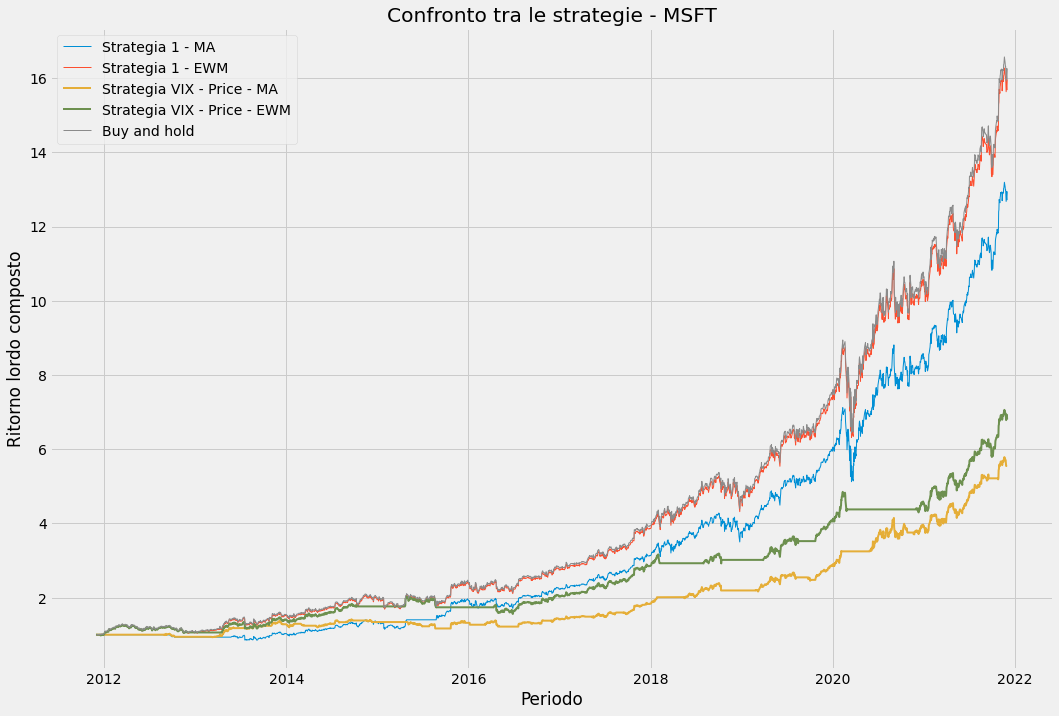

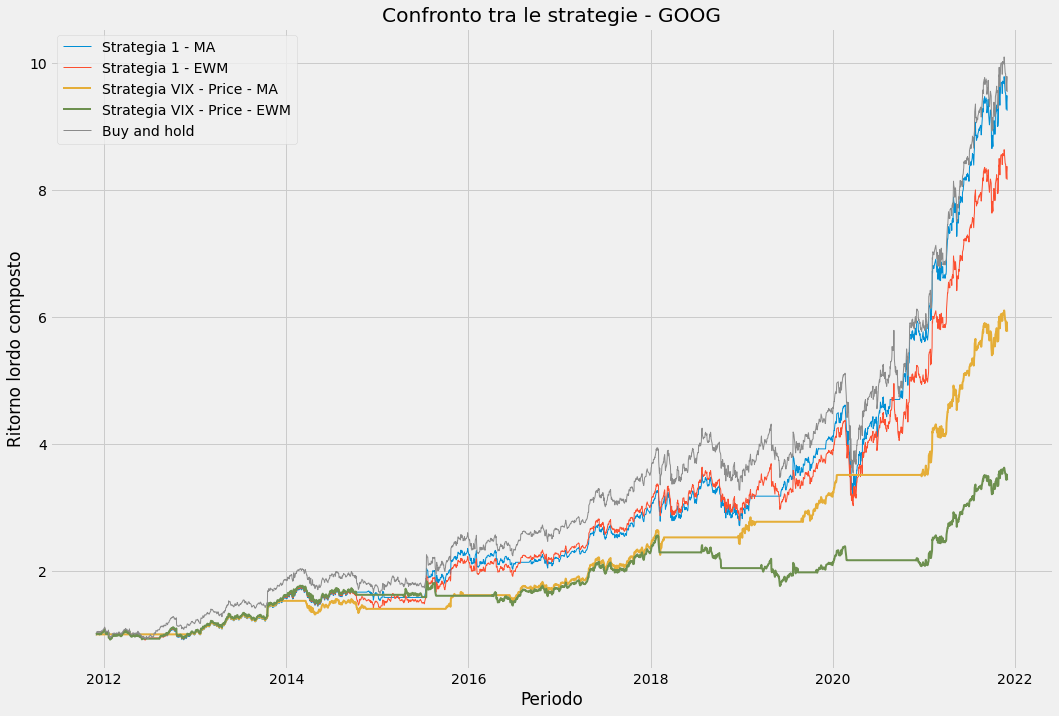

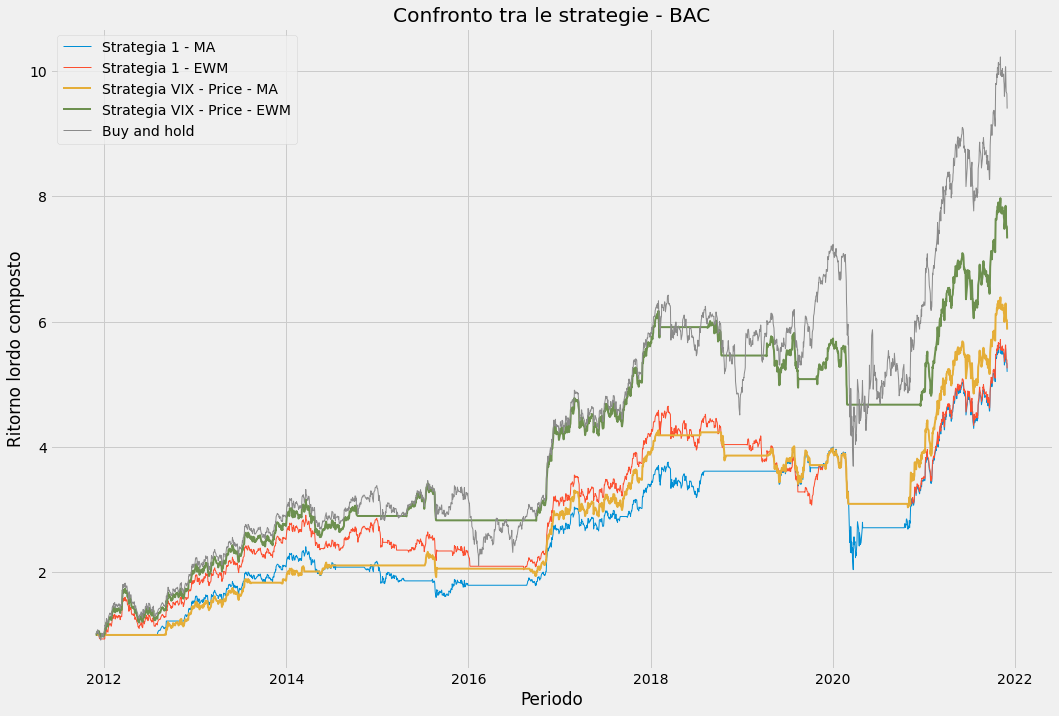

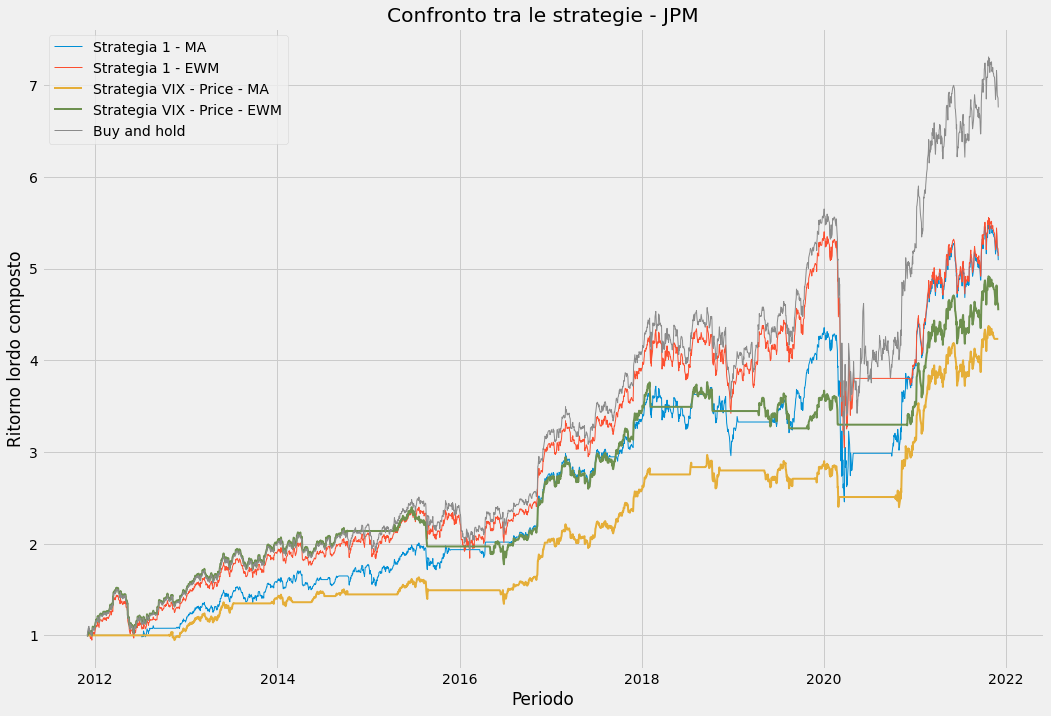

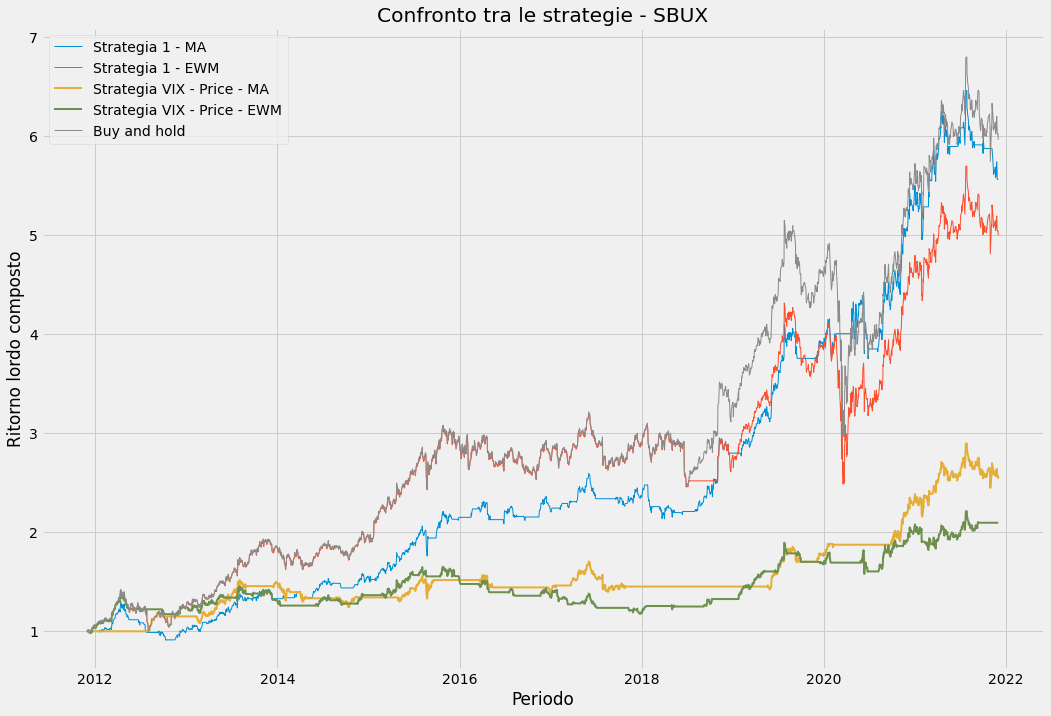

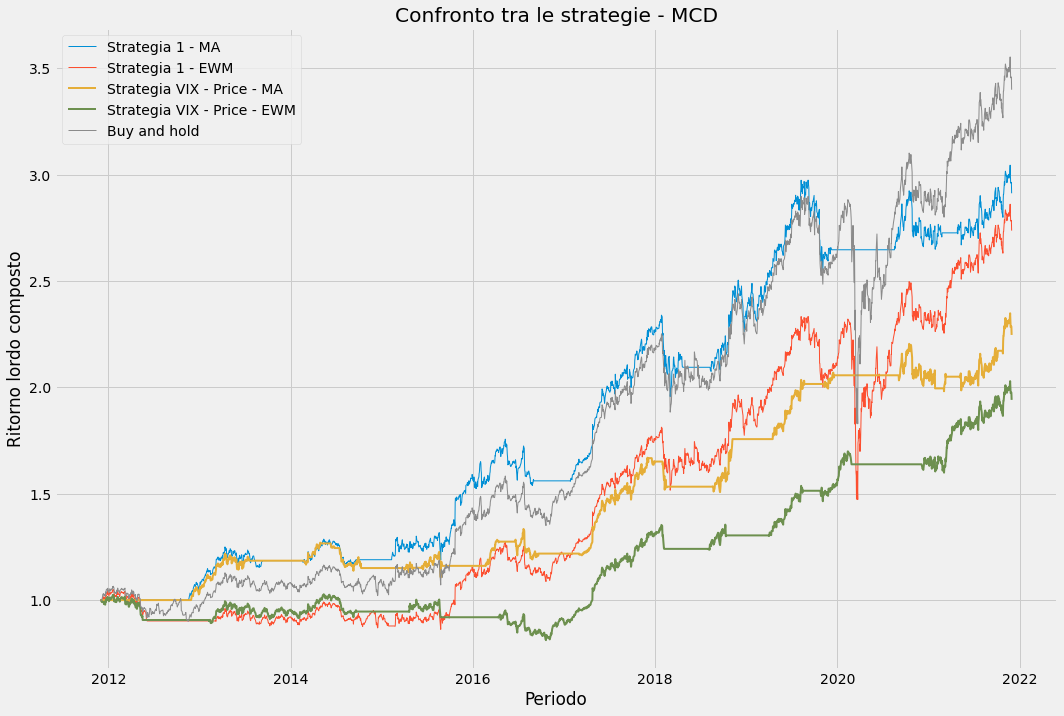

In [167]:

# Creo un grafico che contiene i ritorni composti di tutte le strategie per ogni stock.
for ticker in tickers:
    plt.figure(figsize=(16, 11))
    plt.title('Confronto tra le strategie - ' + ticker)
    plt.plot(strat_1[ticker]['SMA_Returns'], label = 'Strategia 1 - MA', linewidth = 1)
    plt.plot(strat_1[ticker]['EWM_Returns'], label = 'Strategia 1 - EWM', linewidth = 1)
    plt.plot(strat_2[ticker]['SMA_Returns'], label = 'Strategia VIX - Price - MA', linewidth = 2)
    plt.plot(strat_2[ticker]['EWM_Returns'], label = 'Strategia VIX - Price - EWM', linewidth = 2)
    plt.plot(datasets[ticker]['Compounded_returns'], label = 'Buy and hold', linewidth=1)
    plt.xlabel('Periodo')
    plt.ylabel('Ritorno lordo composto')
    plt.legend()
    plt.savefig('./immagini/' + 'ritorni_strategie_' + ticker + '.png')

# Ottimizzazione di portafoglio


In [5]:
# Definisco una funzione che prende in input i pesi trovati al punto precendente e i ritorni attesi e restituisce un dataframe contenente i ritorni, la volatilità e lo sharpe ratio
# Parametri:
# frontier: la lista delle combinazioni di pesi
# exp_rets: I ritorni medi attesi
# return_list: la sequenza dei ritorni durante il periodo
# n: il moltiplicatore per annualizzare i ritorni
def get_portfolio_results(frontier, exp_rets, return_list, n):
    weights = []
    rets = []
    volatilities = []
    sr = []

    # Per ogni combinazione di pesi, calcola le varia statistiche del portafogli associato
    for p in frontier:
        ret = np.sum(p * return_list)
        vol = np.sqrt(np.dot(p.T, np.dot(exp_rets.cov() * n, p)))
        s_r = ret / vol
        rets.append(ret)
        weights.append(p)
        volatilities.append(vol)
        sr.append(s_r)

    result = pd.DataFrame({'weights': weights, 'returns' : rets, 'volatility': volatilities, 'sharpe ratio': sr})
    return result

# Funzione che crea il grafico di una frontiera efficiente
def plot_frontier(result, tickers, ret_list, expected_returns, n, name, best_portfolio):
    MARKS = ['o', 'X', 'd', '*', 'v', '+']

    fig, ax = plt.subplots(figsize = (16, 9))
    result.plot(kind='scatter', x='volatility', s = 200,
                y='returns', c='sharpe ratio',
                cmap='RdYlGn', edgecolors=None,
                ax=ax)
    ax.set(xlabel='Volatilità',
           ylabel='Ritorno atteso',
           title=name)
    ax.scatter([best_portfolio['volatility']], [best_portfolio['returns']], label = 'Portafogli efficiente', s = 600,
               color = 'blue',
               edgecolors = 'black',
               linewidth = 3)
    ax.plot(result['volatility'], result['returns'], 'b--', linewidth = 2)

    for asset_index in range(6):
        ax.scatter(x=np.sqrt((ret_list.cov() * n).iloc[asset_index, asset_index]),
                   y=expected_returns[asset_index],
                   marker=MARKS[asset_index],
                   s=400,
                   color='black',
                   label=tickers[asset_index]
                   )
    ax.legend(labelspacing = 1.5)

    plt.tight_layout()
    plt.savefig('./immagini/' + name + '.png')
    plt.show()

### Ottimizzazione con metodo analitico

In [6]:
import numpy as np
import scipy.optimize as sco

# Creo un dataframe che contiene i ritorni semplici netti a granularità mensile
data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = datasets[ticker]['Adj Close'].resample('M').last().pct_change().dropna()[:'2020-11-30']

# definisco la funzione da minimizzare durante la portfolio optimization
def volatility(w, rets, mat):
    return np.sqrt(np.dot(w.T, np.dot(mat, w)))

# Definisco la funzione che cerca i portafogli efficienti
def frontiera_efficiente_analitico(ritorni, cov_mat, range_ritorni):
    portafogli_efficienti = []

    # Definisco i limiti dei pesi
    bounds = tuple((0, 1) for i in range(len(ritorni)))
    initial_guess = len(ritorni) * [1 / len(ritorni),]

    # Risolvo il problema di ottimizzazione per ogni ritorno atteso prestabilito
    for ret in range_ritorni:
        # Stabilisco i vincoli del problema di minimizzazione:
        # 1 _ Il ritorno atteso del portafogli deve essere uguale a ret
        # 2_ La somma dei pesi deve essere uguale a 1
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(ritorni * x) - ret},
                      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

        # Eseguo il problema di minimizzazione
        efficient_portfolio = sco.minimize(volatility,
                                           x0 = initial_guess,
                                           args= (ritorni, cov_mat), method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)

        portafogli_efficienti.append(efficient_portfolio.x)
    return portafogli_efficienti

# Imposto il numero di unità per annualizzare i ritorni medi
n = 12

# Creo un dataframe che contiene i ritorni attesi, basati sui dati previsti con la rete neurale
expected_returns = pd.DataFrame()
for ticker in tickers:
    expected_returns[ticker] = np.asarray(predicted[ticker])

# Aggiungo le date come indice per fare resampling mensile
expected_returns.index = datasets[tickers[0]].index[datasets[tickers[0]].shape[0] - expected_returns.shape[0]:]
expected_returns = expected_returns.resample('M').last().pct_change().dropna()

# Calcolo i ritorni attesi per ogni stock facendo la media e annualizzandola
p_returns = expected_returns.mean() * n
r_returns = data.mean() * n

# Calcolo le frontiere sia con i dati previsti che con i 12 mese antecedenti al mese 108
frontiera_previsioni = frontiera_efficiente_analitico(p_returns, expected_returns.cov() * n, np.linspace(p_returns.min(), p_returns.max(), 200))
frontiera_passati = frontiera_efficiente_analitico(r_returns, data.cov() * n, np.linspace(r_returns.min(), r_returns.max(), 200))



### Ottimizzazione con il metodo Monte carlo (simulazione)

In [15]:
portfolios_number = 10000

np.random.seed(467)
weights = np.random.random(size = (portfolios_number, len(tickers)))
weights /= np.sum(weights, axis = 1)[:, np.newaxis]

simulated_returns = np.dot(weights, r_returns)

simulated_a = get_portfolio_results(weights, data, r_returns, n)
best_a_portfolio = simulated_a.iloc[simulated_a['sharpe ratio'].idmax()]

plot_frontier(simulated_a, tickers, data, r_returns, n, 'Frontiera efficiente - Ritorni passati (simulazione)', best_a_portfolio)



AttributeError: 'Series' object has no attribute 'idmax'

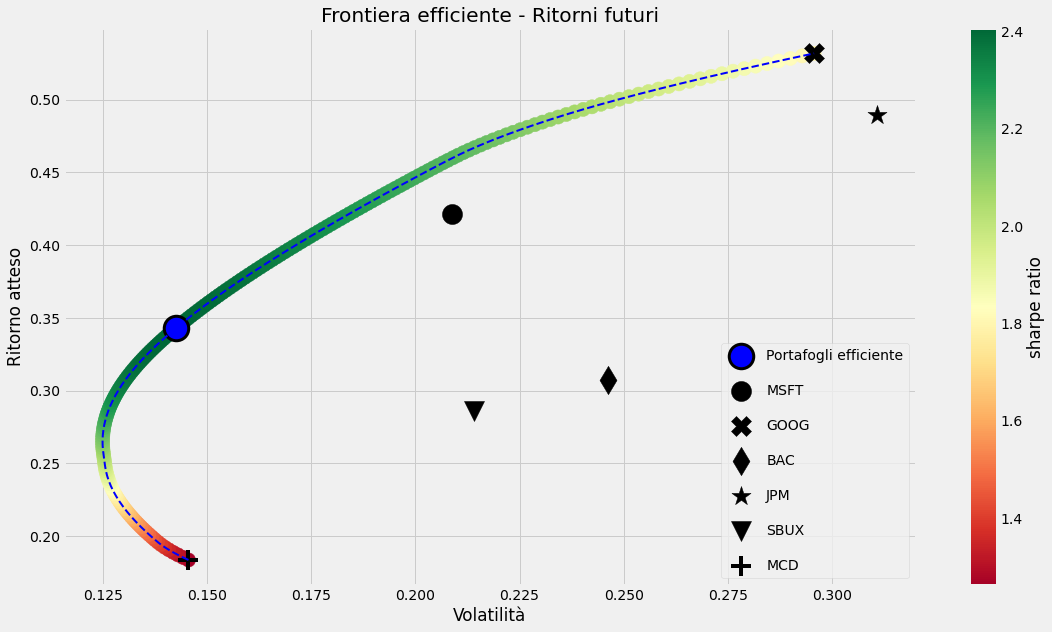

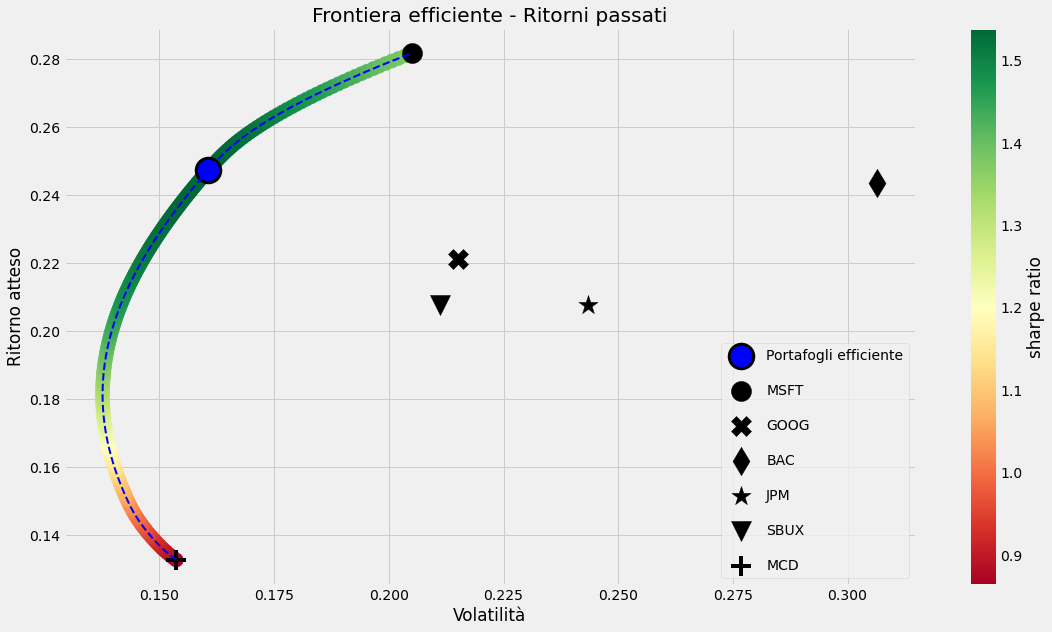

In [13]:


a = get_portfolio_results(frontiera_previsioni, expected_returns, p_returns, n)
b = get_portfolio_results(frontiera_passati, data, r_returns, n)

# Cerco i portafogli con lo sharpe ratio massimo
best_pred_portfolio = a.iloc[a['sharpe ratio'].idxmax()]
best_past_portfolio = b.iloc[b['sharpe ratio'].idxmax()]

plot_frontier(a, tickers, expected_returns, p_returns, n, 'Frontiera efficiente - Ritorni futuri', best_pred_portfolio)
plot_frontier(b, tickers, data, r_returns, n, 'Frontiera efficiente - Ritorni passati', best_past_portfolio)

In [138]:
# Cerco i portafogli che massimizzano lo Sharpe Ratio

# Definisco una funzione di appoggio che calcola il beta. Parametri:
# returns: la lista dei ritorni di un titolo
# benchmark: la lista dei ritorni dell 'indice di benchamrk
# start, end: il periodo considerato per il calcolo del beta
def beta(returns, benchmark, start, end):
    temp_df = pd.DataFrame()
    temp_df['Ret'] = returns.loc[start:end]
    temp_df['Benchmark'] = benchmark.loc[start:end]
    cm = temp_df.cov()
    return cm['Ret']['Benchmark'] / cm['Benchmark']['Benchmark']

print(best_past_portfolio['sharpe ratio'], np.round(best_past_portfolio['weights'], 3))
print(best_pred_portfolio['sharpe ratio'], np.round(best_pred_portfolio['weights'], 3))


# Calcolo i beta dei portafogli come la somma dei beta dei singoli stock pesata per la loro quota nel portafogli
beta_past_portfolio = 0
beta_pred_portfolio = 0
for i in range(0, len(tickers)):
    beta_past_portfolio += best_past_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].resample('M').last().pct_change(), sp500['Adj Close'].resample('M').last().pct_change(), '2011-11-30', '2020-11-30')
    beta_pred_portfolio += best_pred_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].resample('M').last().pct_change(), sp500['Adj Close'].resample('M').last().pct_change(), '2021-01-30', '2021-11-30')

print(beta_past_portfolio, beta_pred_portfolio)

1.5395213915359542 [0.522 0.172 0.    0.028 0.259 0.018]
2.4063088800408026 [0.438 0.019 0.    0.155 0.    0.388]
0.9077335321491266 0.9269672961569752


In [132]:
# Confronto i rendimenti attesi con quelli effettivi

def get_real_return(weights, tickers, expected_returns, start_date, end_date, dataset, n):
    expected_return = np.sum(weights * expected_returns)
    real_returns = pd.DataFrame()
    for ticker in tickers:
        real_returns[ticker] = dataset[ticker]['Adj Close'].resample('M').last().pct_change()[start_date:end_date]
    real_returns = real_returns.mean() * n
    real_portfolio_return = np.sum(weights * real_returns)
    return real_portfolio_return

past_return = np.sum(best_past_portfolio['weights'] * r_returns)
real_past_return = get_real_return(best_past_portfolio['weights'], tickers, r_returns, '2020-12-01', '2021-11-30', datasets, n)

pred_return = np.sum(best_pred_portfolio['weights'] * p_returns)
real_pred_return = get_real_return(best_pred_portfolio['weights'], tickers, p_returns, '2021-01-31', '2021-11-30', datasets, n)
print(past_return, real_past_return)
print(pred_return, real_pred_return)

print(r_returns)


0.24723513461895263 0.38628415273499656
0.34107161167278954 0.32978229325086467
MSFT    0.281687
GOOG    0.221183
BAC     0.243652
JPM     0.207662
SBUX    0.207558
MCD     0.132647
dtype: float64
